# Importing necessary libraries

In [20]:
import pandas as pd
import re  #regular expression
import nltk # library for tokenization & removing stop words
nltk.download('punkt_tab') # pretrained tokenizer model
from nltk.tokenize import word_tokenize # Splits text into words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # return the word to its origin
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #standardize the lengths of sequences for NN
import tensorflow as tf
# Download the necessary datasets
nltk.download('punkt')  # For word_tokenize
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet') #database of English words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install datasets

# Dataset1

## Load the data

In [3]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_parquet("hf://datasets/jhan21/amazon-reviews-balanced-text/data/train-00000-of-00001.parquet")

In [8]:
dataset1 = df

## Drop unneeded columns

In [9]:
dataset1.head()

,rating,title,text,__index_level_0__,sentiment,sentiment_text,tokens_text,nb_tokens_text
0,1,Not user friendly.,Wasn't impressed. Need very long hair for the ...,595866,-1,negative,"[Was, n't, impressed, ., Need, very, long, hai...",12
1,1,Shorter than expected,The description says this wig is 24” but it’s ...,551720,-1,negative,"[The, description, says, this, wig, is, 24, ”,...",23
2,1,One Star,I almost finished use my product when it arrived.,279320,-1,negative,"[I, almost, finished, use, my, product, when, ...",10
3,2,Didn't work for me,Doesn't work at all as advertised,658482,-1,negative,"[Does, n't, work, at, all, as, advertised]",7
4,1,DO NOT BUY!,The bars are way to short i didnt get all 20 b...,668873,-1,negative,"[The, bars, are, way, to, short, i, didnt, get...",45


In [10]:
dataset1.describe()

,rating,__index_level_0__,sentiment,nb_tokens_text
count,167082.000000,167082.000000,167082.000000,167082.000000
mean,3.046223,350092.260758,0.000000,40.229432
std,1.486488,202476.785053,0.816499,55.989568
min,1.000000,7.000000,-1.000000,0.000000
25%,2.000000,174983.750000,-1.000000,11.000000
50%,3.000000,350204.500000,0.000000,25.000000
75%,5.000000,524576.000000,1.000000,49.000000
max,5.000000,701518.000000,1.000000,3098.000000


In [11]:
dataset1.drop(columns = ['title', '__index_level_0__', 'sentiment', 'tokens_text', 'nb_tokens_text' ],
             inplace = True)

In [12]:
dataset1.head()

,rating,text,sentiment_text
0,1,Wasn't impressed. Need very long hair for the ...,negative
1,1,The description says this wig is 24” but it’s ...,negative
2,1,I almost finished use my product when it arrived.,negative
3,2,Doesn't work at all as advertised,negative
4,1,The bars are way to short i didnt get all 20 b...,negative


 5+4 ----> positive    ,       
 3 ------> neutral    ,          
 1 +2 ----> negative




In [13]:
dataset1.rating.value_counts()

,count
rating,
3,55694
5,46888
1,39165
2,16529
4,8806


In [14]:
dataset1['sentiment_text'].value_counts()

,count
sentiment_text,
negative,55694
neutral,55694
positive,55694


In [15]:

def label_sentiment(rating):
    if rating in [1, 2]:
        return 0  # negative
    elif rating == 3:
        return 1  # neutral
    else:
        return 2  # positive

dataset1['label'] = dataset1['rating'].apply(label_sentiment)

In [16]:
dataset1.head()

,rating,text,sentiment_text,label
0,1,Wasn't impressed. Need very long hair for the ...,negative,0
1,1,The description says this wig is 24” but it’s ...,negative,0
2,1,I almost finished use my product when it arrived.,negative,0
3,2,Doesn't work at all as advertised,negative,0
4,1,The bars are way to short i didnt get all 20 b...,negative,0


In [17]:
dataset1.drop(columns = ['rating', 'sentiment_text'], inplace = True)

# Check for cleaning data

In [18]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167082 entries, 0 to 167081
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    167082 non-null  object
 1   label   167082 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [19]:
dataset1.isnull().sum()

,0
text,0
label,0


In [20]:
dataset1.duplicated().sum()

np.int64(5815)

In [21]:
dataset1.drop_duplicates(inplace = True)

In [22]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161267 entries, 0 to 167081
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    161267 non-null  object
 1   label   161267 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [23]:
dataset1['label'].value_counts()

,count
label,
1,54628
0,54536
2,52103


In [24]:
dataset1.head()

,text,label
0,Wasn't impressed. Need very long hair for the ...,0
1,The description says this wig is 24” but it’s ...,0
2,I almost finished use my product when it arrived.,0
3,Doesn't work at all as advertised,0
4,The bars are way to short i didnt get all 20 b...,0


# EDA

classes destribution

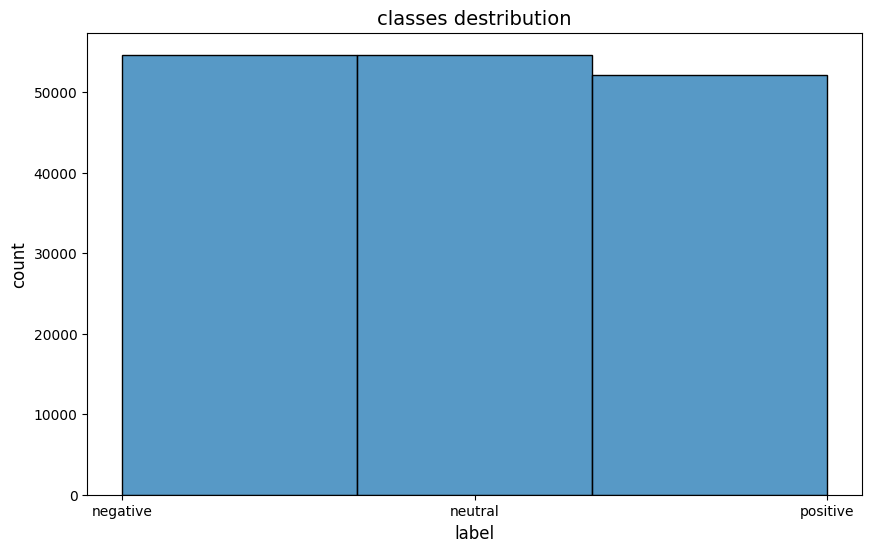

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset1, x='label', bins = 3)
plt.xticks(ticks=[0, 1, 2], labels=['negative', 'neutral', 'positive'])


plt.title('classes destribution' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

# preprocessing the text in the data:

function for cleaning the text

In [29]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) >= 3]

    indices = np.unique(Words, return_index=True)[1]  #Sites of the first appearance of unique words in Words
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()  # List of unique words sorted by first appearance

    return cleaned_text

In [30]:
x = dataset1.drop('label', axis =1)
y = dataset1['label']

In [31]:
texts=list(x['text'])

In [32]:
cleaned_text = [process_text(text) for text in texts]

In [33]:
print(cleaned_text[:10])

[['impressed', 'need', 'long', 'hair', 'full', 'benefit'], ['description', 'say', 'wig', 'even', 'close', 'barley'], ['almost', 'finished', 'use', 'product', 'arrived'], ['work', 'advertised'], ['bar', 'way', 'short', 'didnt', 'get', 'lip', 'started', 'bleed', 'next', 'morning', 'cut', 'blood', 'flow', 'ever', 'buy', 'tese', 'wast', 'money'], ['hair', 'quality', 'poor', 'within', 'week', 'getting', 'styled', 'looked', 'horrible', 'would', 'buy', 'wish', 'could', 'get', 'money', 'back'], ['suck', 'twist', 'tip', 'little', 'product'], ['hard', 'use', 'keep', 'place'], ['crimp', 'metal', 'kept', 'falling', 'acetone', 'destroy'], ['unhappy', 'product', 'look', 'picture', 'order', 'particular', 'item', 'gave', 'star', 'would', 'submit', 'review', 'without', 'given', 'least']]


In [34]:
empty = []
for i in range(len(cleaned_text)):
  if cleaned_text[i] == []:
    empty.append(i)
#print(empty)
len(empty)


321

In [35]:
length = []
for i in range(len(cleaned_text)):
  length.append(len(cleaned_text[i]))

ds = pd.Series(length)
ds.value_counts()

,count
4,10184
5,9666
6,9429
3,9375
7,8702
...,...
371,1
222,1
231,1
234,1


<Axes: ylabel='Count'>

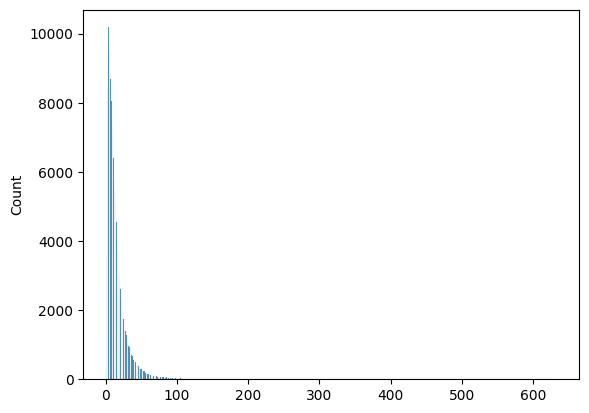

In [36]:
sns.histplot(data = ds)

In [37]:
x_temp, x_test, y_temp, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

# prepare the data to the model

In [38]:
# convert words to sequence of numbers
max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)  # makes dictionary of the words and its number
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx) # may be greater than max_vocab
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_val = tokenizer.texts_to_sequences(x_val)


the size of vocab = 31040


In [39]:
# padding (make all sequences with the same length)
maxlen = 20
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)
x_val = pad_sequences(x_val,maxlen=maxlen)


In [40]:
dataset1['label'].value_counts()

,count
label,
1,54628
0,54536
2,52103


In [41]:
y.value_counts()

,count
label,
1,54628
0,54536
2,52103


# Build LSTM model

In [55]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=50
inputt=Input(shape=(maxlen,))

In [65]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0005  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt) # each word will be a vector of 50 numbers
x = Dropout(0.3)(x)
x = LSTM(4)(x)
#x = Dense(16, activation='relu')(x)
x = Dense(3, activation='softmax')(x) # out

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


weights for unbalanced classes

In [57]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1, 2])
class_weights = compute_class_weight('balanced', classes=classes, y=dataset1['label'])
class_weight_dict = dict(zip(classes, class_weights))

In [58]:
class_weight_dict

{np.int64(0): np.float64(0.9856914087330693),
 np.int64(1): np.float64(0.9840313880549657),
 np.int64(2): np.float64(1.0317192228214627)}

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [67]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), class_weight=class_weight_dict, callbacks=[early_stopping] )


Epoch 1/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.5556 - loss: 0.9175 - val_accuracy: 0.6613 - val_loss: 0.7468
Epoch 2/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6901 - loss: 0.7013 - val_accuracy: 0.6670 - val_loss: 0.7401
Epoch 3/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.7123 - loss: 0.6620 - val_accuracy: 0.6661 - val_loss: 0.7468
Epoch 4/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.7238 - loss: 0.6364 - val_accuracy: 0.6643 - val_loss: 0.7514
Epoch 5/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7318 - loss: 0.6191 - val_accuracy: 0.6597 - val_loss: 0.7583
Epoch 6/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.7414 - loss: 0.6008 - val_accuracy: 0.6611 - val_loss: 0.7698
Epoch 7/20
3024/3024 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.7466 - loss: 0.5842 - val_accuracy: 0.6596 - val_loss: 0.7823


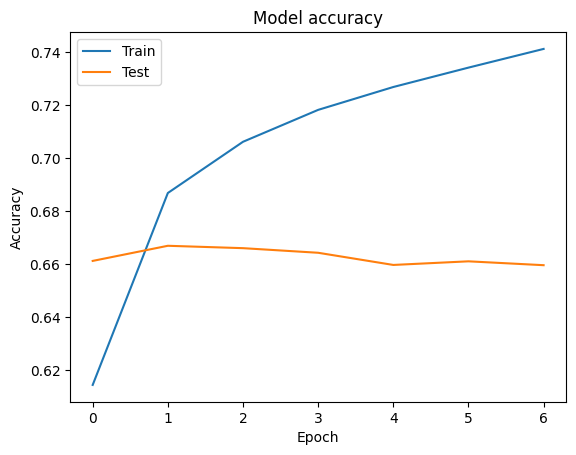

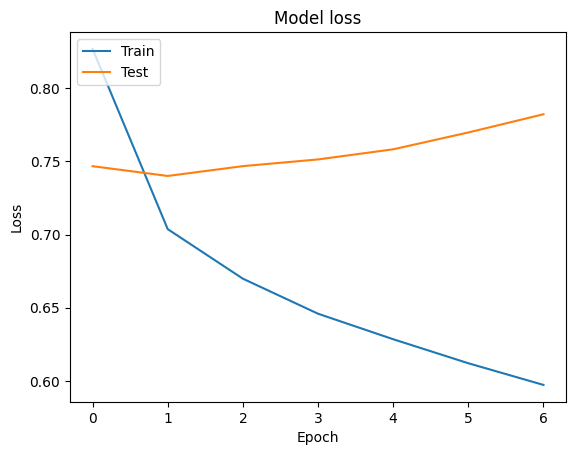

In [68]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


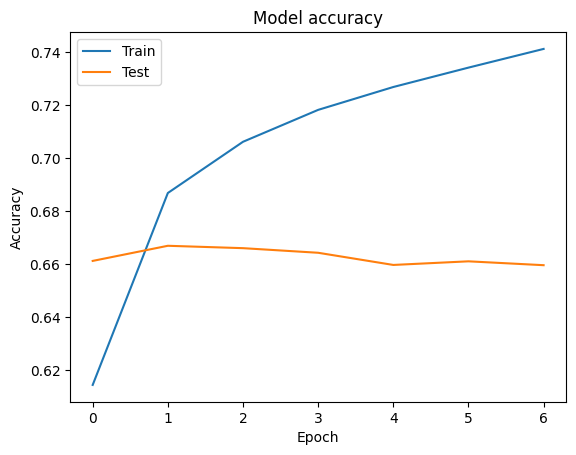

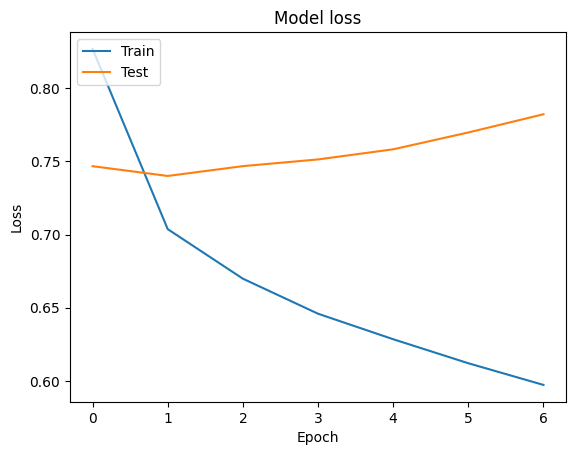

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [69]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6646 - loss: 0.7359
Test Loss: 0.7366369366645813
Test Accuracy: 0.6680411696434021


In [70]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

    Negative       0.68      0.69      0.69     10754
     Neutral       0.57      0.59      0.58     10934
    Positive       0.76      0.73      0.74     10566

    accuracy                           0.67     32254
   macro avg       0.67      0.67      0.67     32254
weighted avg       0.67      0.67      0.67     32254



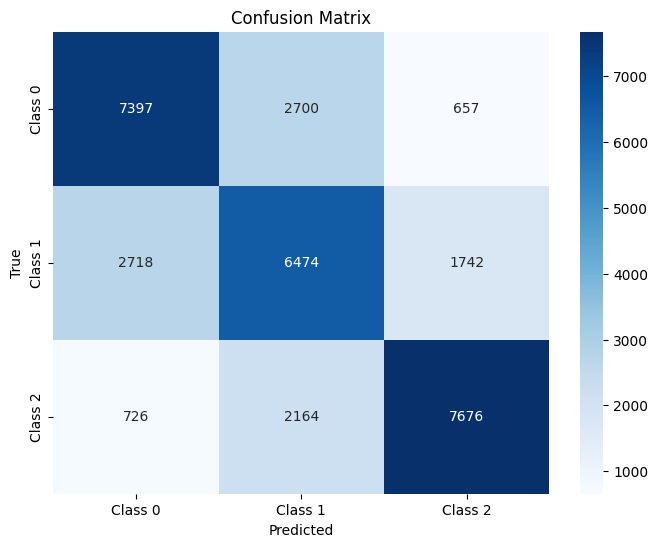

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


#y_pred = model.predict(X_test)
# y_pred_labels = np.argmax(y_pred_probs, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# my try

In [72]:
menna = 'a bad services'
menna2 = ' good services and amazing people'

menna_cleaned = process_text(menna)
menna2_cleaned = process_text(menna2)


In [73]:
menna_cleaned

['bad', 'service']

In [74]:
menna_cleaned = tokenizer.texts_to_sequences(menna_cleaned)
menna2_cleaned = tokenizer.texts_to_sequences(menna2_cleaned)

menna_cleaned = pad_sequences(menna_cleaned,maxlen=maxlen)
menna2_cleaned = pad_sequences(menna2_cleaned,maxlen=maxlen)


In [75]:
y = model.predict(menna_cleaned)
y2 = model.predict(menna2_cleaned)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [79]:
y =np.argmax(y, axis=1)[0]

In [80]:
y

np.int64(0)

In [78]:
y2

np.int64(2)

# DATASET 2

## Load the dataset

In [7]:
import dask.dataframe as dd

splits = {'train': 'data/train-*-of-*.parquet', 'test': 'data/test-00000-of-00001-6fa4a98b9bb40736.parquet'}
tr = dd.read_parquet("hf://datasets/vincha77/filtered_yelp_restaurant_reviews/" + splits["train"])
st = dd.read_parquet("hf://datasets/vincha77/filtered_yelp_restaurant_reviews/" + splits["test"])

In [8]:
dataset2_tr = tr.compute()
dataset2_st = st.compute()

## dataset info

In [23]:
dataset2_tr.head()

,text,label
0,All around lovely brunch spot! Cute and quaint...,2
1,The menu is not really all that selective but ...,1
2,The beer here is excellent. And the price for...,2
3,Have been going to the Eldorado for many years...,2
4,We had an unbelievable Saturday brunch here ou...,2


In [24]:
dataset2_st.head()

,text,label,review_length
0,I had a party of 11 on a Sunday evening schedu...,0,138
1,"Wrong drink. Spilled drink. Womp, womp, womp. ...",1,214
2,Ate here during my stay in French Quarters. Lo...,2,128
3,Had a graduation lunch for 11 guests. I would ...,1,257
4,Last stop in NOLA and it was a good one! We st...,2,225


In [25]:
dataset2_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426230 entries, 0 to 357092
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1426230 non-null  string
 1   label   1426230 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 1.4 GB


In [26]:
dataset2_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356537 entries, 0 to 356536
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   text           356537 non-null  string
 1   label          356537 non-null  int64 
 2   review_length  356537 non-null  int64 
dtypes: int64(2), string(1)
memory usage: 362.1 MB


In [27]:
dataset2_tr.describe()

,label
count,1.426230e+06
mean,1.326651e+00
std,8.619945e-01
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,2.000000e+00
max,2.000000e+00


<Axes: xlabel='review_length', ylabel='Count'>

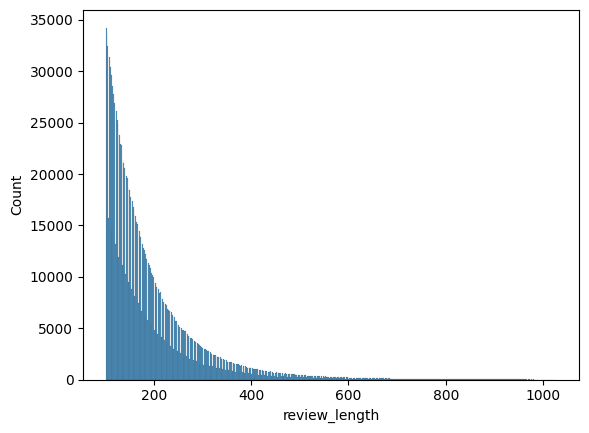

In [6]:
sns.histplot(data = dataset2_tr, x = 'review_length')

150 avg

In [29]:
dataset2_tr.label.value_counts()

,count
label,
2,838898
0,373019
1,214313


In [12]:
dataset2_tr.drop(columns=['review_length'], inplace = True)

In [13]:
dataset2_tr.duplicated().sum()

np.int64(2145)

In [14]:
dataset2_tr.drop_duplicates(inplace = True)

In [32]:
dataset2_tr.label.value_counts()

,count
label,
2,838898
0,373019
1,214313


In [31]:
class_0 = dataset2_tr[dataset2_tr['label'] == 0]
class_1 = dataset2_tr[dataset2_tr['label'] == 1]
class_2 = dataset2_tr[dataset2_tr['label'] == 2]

class_2_sampled = class_2.sample(n=500000, replace=False, random_state=42)  # replace=False avoid redundant


balanced_tr = pd.concat([class_0, class_1, class_2_sampled])

balanced_tr = balanced_tr.drop_duplicates()


In [33]:
print(balanced_tr['label'].value_counts())

label
2    500000
0    373019
1    214313
Name: count, dtype: int64


In [34]:
balanced_tr.head()

,text,label
8,Ordered a personal pizza and an order of fried...,0
12,DO NOT EAT HERE! I should of listened to all...,0
13,I went to Parlour with a group of friends on a...,0
17,Seated right away in cantina. Placed our drink...,0
20,This is one of the worst locations I've ever h...,0


## EDA

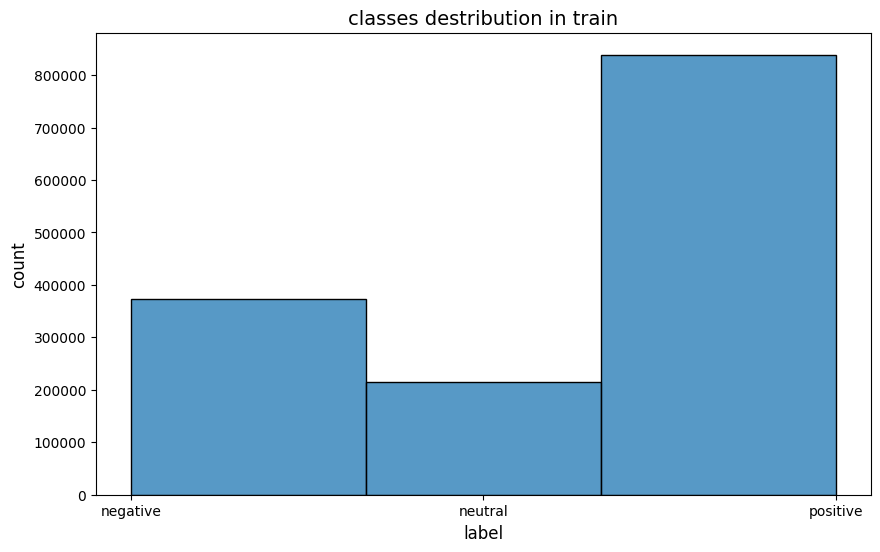

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data = dataset2_tr, x = 'label', bins = 3)
plt.xticks(ticks=[0, 1, 2], labels=['negative', 'neutral', 'positive'])


plt.title('classes destribution in train' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()


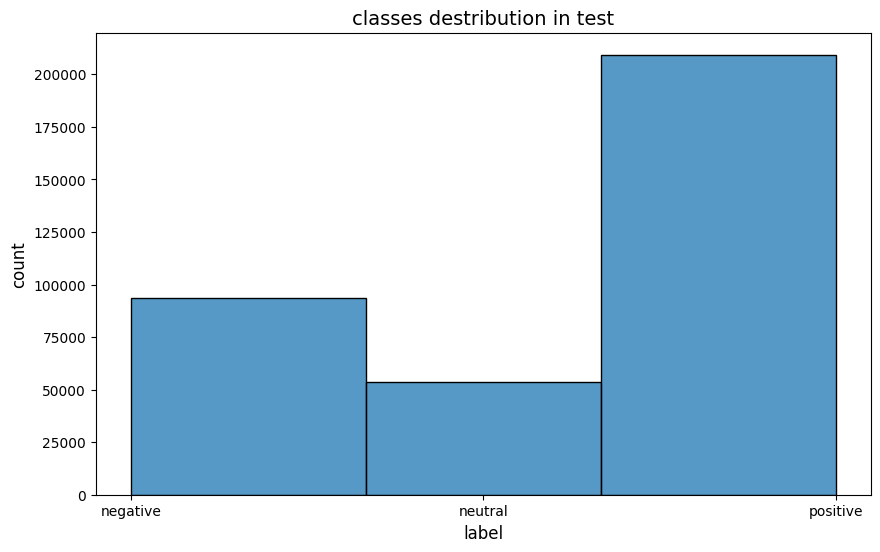

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(data = dataset2_st, x = 'label', bins = 3)
plt.xticks(ticks=[0, 1, 2], labels=['negative', 'neutral', 'positive'])


plt.title('classes destribution in test' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

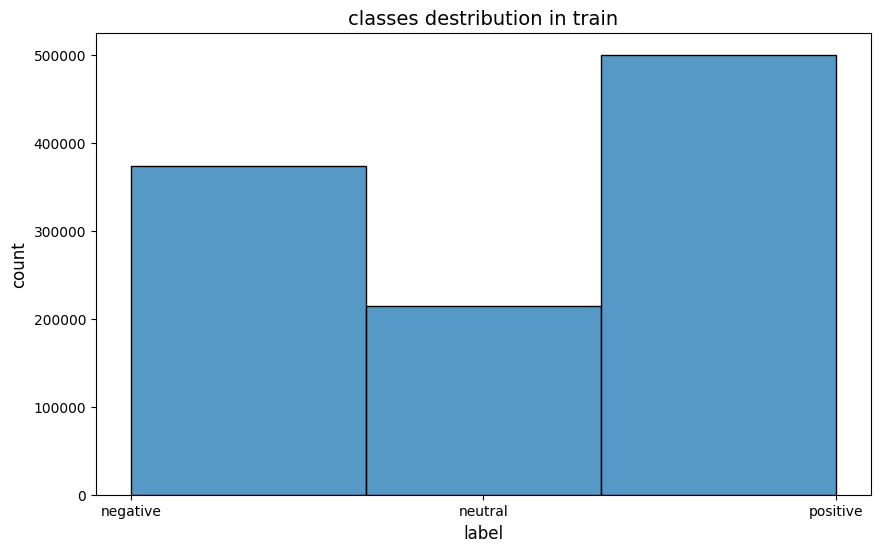

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data = balanced_tr, x = 'label', bins = 3)
plt.xticks(ticks=[0, 1, 2], labels=['negative', 'neutral', 'positive'])


plt.title('classes destribution in train' , fontsize=14)
plt.xlabel('label', fontsize=12)
plt.ylabel('count', fontsize=12)


plt.show()

## preprocessing the text in the data:

In [9]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) >= 3]

    indices = np.unique(Words, return_index=True)[1]  #Sites of the first appearance of unique words in Words
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()  # List of unique words sorted by first appearance

    return cleaned_text

prepare train & valid

In [15]:
dataset2_tr.columns

Index(['text', 'label'], dtype='object')

In [16]:
dataset2_st.columns

Index(['text', 'label', 'review_length'], dtype='object')

In [37]:
balanced_tr.columns

Index(['text', 'label'], dtype='object')

In [38]:
x_tr = balanced_tr.drop('label', axis =1)
y_tr = balanced_tr['label']

x_st = dataset2_st['text']
y_st = dataset2_st['label']

In [39]:
texts_tr=list(x_tr['text'])

texts_st= list(x_st)

In [ ]:
cleaned_text_tr = [process_text(text) for text in texts_tr]

In [ ]:
from multiprocessing import Pool

def process_text_wrapper(text):
    return process_text(text)

with Pool(processes=4) as pool:
    cleaned_text_st = pool.map(process_text_wrapper, dataset2_st['text'].tolist())

In [ ]:
print(cleaned_text_tr[:10])
print(cleaned_text_st[:10])

In [ ]:
empty_tr = []
for i in range(len(cleaned_text_tr)):
  if cleaned_text_tr[i] == []:
    empty.append(i)
#print(empty)
print(len(empty_tr))


empty_st = []
for i in range(len(cleaned_text_st)):
  if cleaned_text_st[i] == []:
    empty.append(i)
#print(empty)
print(len(empty_st))

In [ ]:
length = []
for i in range(len(cleaned_text_tr)):
  length.append(len(cleaned_text_tr[i]))

ds = pd.Series(length)
ds.value_counts()

In [ ]:
sns.histplot(data = ds)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(cleaned_text_tr, y_tr, test_size=0.2, random_state=42)

# prepare the data

In [ ]:
# convert words to sequence of numbers
max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)  # makes dictionary of the words and its number
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx) # may be greater than max_vocab
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_val = tokenizer.texts_to_sequences(x_val)


In [ ]:
# padding (make all sequences with the same length)
maxlen = 20
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)
x_val = pad_sequences(x_val,maxlen=maxlen)

In [ ]:
dataset2_tr['label'].value_counts()

In [ ]:
dataset2_st['label'].value_counts()

# Build LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=50
inputt=Input(shape=(maxlen,))

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0005  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt) # each word will be a vector of 100 numbers
x = Dropout(0.3)(x)
x = LSTM(4)(x)
#x = Dense(16, activation='relu')(x)
x = Dense(3, activation='softmax')(x) # out

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# DATASET 3

In [2]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
dataset3_train = pd.read_parquet("hf://datasets/waseemrazakhan/sentiment-balanced-v1/" + splits["train"])
dataset3_valid = pd.read_parquet("hf://datasets/waseemrazakhan/sentiment-balanced-v1/" + splits["validation"])
dataset3_test = pd.read_parquet("hf://datasets/waseemrazakhan/sentiment-balanced-v1/" + splits["test"])

In [3]:
dataset3_train.head()

,text,label
0,I use this moisturizer am and pm and it lasted...,1
1,Purchase this phone try to activate and was im...,0
2,"-Update-Video play backI have gotten the ""fix""...",0
3,I have been using the laptop for a little over...,1
4,"Fits perfectly, and really works.",1


In [4]:
dataset3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20744 entries, 0 to 20743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20744 non-null  object
 1   label   20744 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 324.3+ KB


In [5]:
dataset3_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2593 non-null   object
 1   label   2593 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


In [6]:
dataset3_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2593 non-null   object
 1   label   2593 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2593 non-null   object
 1   label   2593 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


In [ ]:
train.isnull().sum()

,0
text,0
label,0


In [ ]:
train.label.value_counts()

,count
label,
1,10372
0,10372


In [ ]:
test.label.value_counts()

,count
label,
0,1297
1,1296


In [ ]:
valid.label.value_counts()

,count
label,
1,1297
0,1296


In [ ]:
train.duplicated().sum()

np.int64(4378)

In [ ]:
train.drop_duplicates(inplace= True)

In [ ]:
valid.duplicated().sum()

np.int64(99)

In [ ]:
valid.drop_duplicates(inplace= True)

In [ ]:
train.label.value_counts()

,count
label,
1,9997
0,6369


In [ ]:
valid.label.value_counts()

,count
label,
1,1284
0,1210


# EDA

In [ ]:
train.isnull().sum()

,0
text,0
label,0
